<img src="https://raw.githubusercontent.com/instill-ai/cookbook/main/images/Logo.png" alt="Instill Logo" width="300"/>

# Curate Structured Insights from the Web with **Instill VDP** on **Instill Cloud**

In this notebook we will demonstrate how to generate structured insights from the web using either a Google Search query, or simply specifying a URL. This content complements our tutorial: ["Mastering OpenAI's Structured Outputs"](https://www.instill.tech/blog/llm-structured-outputs2), where we provide a step-by-step guide for building an LLM-powered knowledge curation pipeline with **Instill VDP** on **Instill Cloud**, highlight best practices along the way.

More specifically, we will be calling two pipelines in this notebook using our [Python SDK](https://www.instill.tech/docs/sdk/python):
1. Full Pipeline: [structured-web-insights](https://instill.tech/instill-ai/pipelines/structured-web-insights/playground?_gl=1*2iag4q*_ga*MTg5MzI3MTUyNi4xNzI2MTQ4ODYy*_ga_GXVMFEHM50*MTcyNjIxMzI3MS4yLjEuMTcyNjIxMzc3Ni4wLjAuMA..) (requires your own Google API key, see setup docs)
2. URL-only Version: [structured-website-summary](https://instill.tech/instill-ai/pipelines/structured-website-summary/playground?_gl=1*53h6zr*_ga*MTg5MzI3MTUyNi4xNzI2MTQ4ODYy*_ga_GXVMFEHM50*MTcyNjIxMzI3MS4yLjEuMTcyNjIxMzc3Ni4wLjAuMA..) (no Google search, input specific URL)

We recommend that you first start by going through the [tutorial](https://www.instill.tech/blog/llm-structured-outputs2) - **see the video below** - which walks you through the steps required to build the pipeline that we will be calling in this notebook!

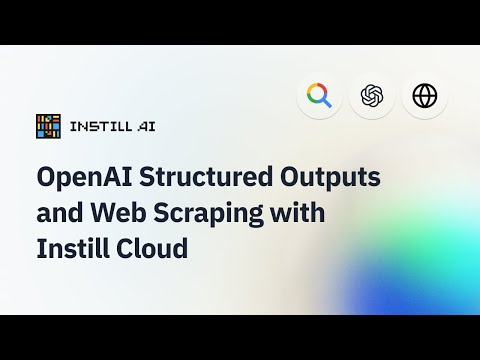

In [16]:
from IPython.display import YouTubeVideo, IFrame

YouTubeVideo('x0XsmuCrit8', width=1000, height=600)

### Setup

To execute all of the code in this notebook, you’ll need to create a free Instill Cloud account and setup an API Token. To create your account, please refer to our [quickstart guide](https://www.instill.tech/docs/quickstart). For generating your API Token, consult the [API Token Management](https://www.instill.tech/docs/core/token) page.

**This will give you access to 10,000 free credits per month that you can use to make API calls with third-party AI vendors. Please see our [documentation](https://www.instill.tech/docs/cloud/credit) for further details.**

We will now install the latest Instill Python SDK, import the required libraries, and configure the SDK with a valid API token.

In [2]:
!pip install instill-sdk==0.12.1 --quiet

In [3]:
from instill.clients.client import init_pipeline_client
from google.protobuf.json_format import MessageToDict
from pprint import pprint

import os

In [17]:
IFrame('https://instill.tech/instill-ai/pipelines/structured-web-insights-from-url/preview', width=1000, height=700)

In [5]:
pipeline = init_pipeline_client(api_token=os.getenv('INSTILL_API_TOKEN'))

response = pipeline.trigger_namespace_pipeline(
    namespace_id="instill-ai",
    pipeline_id="structured-web-insights-from-url",
    data=[{"query": "What is instill ai?",
           "website-url": "https://www.bhf.org.uk/informationsupport/risk-factors"}],
)

In [7]:
response = MessageToDict(response)

structured_output = response["outputs"][0]["structured-output"]
pprint(structured_output)

{'author': 'Not specified',
 'key_insights': ['High cholesterol and high blood pressure significantly '
                  'increase the risk of heart diseases.',
                  'Diabetes can damage blood vessels, leading to serious '
                  'cardiovascular issues.',
                  'Obesity, particularly central obesity, is a major health '
                  'risk.',
                  'Smoking nearly doubles the risk of heart attacks.',
                  'Physical inactivity is detrimental to heart health.',
                  'Family history can influence individual risk levels.',
                  'Environmental factors like air pollution can adversely '
                  'affect heart health.',
                  'Stress and mental health conditions can lead to unhealthy '
                  'lifestyle choices that increase risk.'],
 'published_date': 'Not specified',
 'source': 'British Heart Foundation (BHF)',
 'summary': 'The content discusses various risk factors fo

In [18]:
from IPython.display import Markdown

In [19]:
display(Markdown(response["outputs"][0]["scraped-content"]))

Risk factors for heart and circulatory diseases \| BHF - BHF[Skip to main content](http://www.bhf.org.uk#main-content)

[BHF home page](http://www.bhf.org.uk/)

![Blood pressure being measured](http://www.bhf.org.uk/-/media/images/information-support/risk-factors/landing-page/hero-image-960x790.jpg?rev=40d3b51df9704edc8f43fbf1b24282ac&mh=790&la=en&h=790&w=960&mw=960&hash=49536284B452FE1AF3270FDED69B7F59)

![High cholesterol test](http://www.bhf.org.uk/-/media/images/information-support/risk-factors/landing-page/high-cholesterol-570x380.jpg?rev=a89ded0c58834119a577aace12b6a76c&mh=380&la=en&h=380&w=570&mw=570&hash=9F3C814B55761ACE85A154DA5DBA44F7)

## High cholesterol

Cholesterol is a fatty substance in your blood. Too much of it can increase your risk of heart and circulatory diseases.

[Learn more about high cholesterol](https://www.bhf.org.uk/informationsupport/risk-factors/high-cholesterol)

![Patient getting their blood pressure checked](http://www.bhf.org.uk/-/media/images/information-support/risk-factors/landing-page/blood-pressure-570x380.png?rev=2d79bf1f786d4694ad06063b5666cdcb&mh=380&la=en&h=380&w=570&mw=570&hash=B8C49C1F7DE469403004688786E25AB9)

## High blood pressure

High blood pressure is also called hypertension. Knowing your blood pressure could save your life.

[Understand high blood pressure](https://www.bhf.org.uk/informationsupport/risk-factors/high-blood-pressure)

![Finger prick to measure blood glucose](http://www.bhf.org.uk/-/media/images/information-support/risk-factors/landing-page/diabetes-570x380.jpg?rev=2ba599037ac74c8e8e735d0f49ee594f&mh=380&la=en&h=380&w=570&mw=570&hash=3531A95CC2DCA2416C73A68A1B59E1B7)

## Diabetes

Diabetes can cause damage to your blood vessels. This can lead to a heart attack or a stroke.

[Read more on diabetes](https://www.bhf.org.uk/informationsupport/risk-factors/diabetes)

![Person standing on a weight scale](http://www.bhf.org.uk/-/media/images/information-support/risk-factors/landing-page/obesity-570x380.jpg?rev=63a8299a6f6d46a99e6435b1559d4320&mh=380&la=en&h=380&w=570&mw=570&hash=479E1F70319015EA2283AD21325B040D)

## Obesity

Being overweight can have a big impact on your health, especially if you carry weight around your middle.

[Find out more about obesity](https://www.bhf.org.uk/informationsupport/risk-factors/your-weight-and-heart-disease)

![Cigarettes in an ash tray](http://www.bhf.org.uk/-/media/images/information-support/risk-factors/landing-page/smoking-570x380.jpg?rev=f9196cda682b4a7e8798f436bd023924&mh=380&la=en&h=380&w=570&mw=570&hash=5E962F7C31AC66188BFB5AC55FEBD918)

## Smoking

Smokers are almost twice as likely to have a heart attack compared to people who have never smoked.

[Learn more about smoking](https://www.bhf.org.uk/informationsupport/risk-factors/smoking)

![Person sitting on a couch watching TV](http://www.bhf.org.uk/-/media/images/information-support/risk-factors/landing-page/physical-inactivity-570x380.jpg?rev=62ac7d1dabec47f8b2352d26a1bdcc08&mh=380&la=en&h=380&w=570&mw=570&hash=75957D7DFE67CCDAAC4B64C9EEC28C06)

## Physical inactivity

The heart is a muscle, and like any other muscle it needs physical activity to help it work properly.

[Learn the risks of physical inactivity](https://www.bhf.org.uk/informationsupport/risk-factors/physical-inactivity)

## More information

### Our leaflets

Order or download our information booklets about risk factors of heart and circulatory diseases, healthy eating and keeping your heart healthy.

[Get leaflets](http://www.bhf.org.uk/informationsupport/publications)

### Living with conditions

We know it can be overwhelming if you're diagnosed with a heart or circulatory condition, but we're here to help. Read on to find out what support we can offer.

[Browse conditions](http://www.bhf.org.uk/informationsupport/conditions)

### Risk factor research

We fund research into risk factors because if we can reduce or prevent them, fewer people may be affected by heart and circulatory diseases.

[Our research](http://www.bhf.org.uk/what-we-do/our-research/risk-factor-research)

![Multi-generational family](http://www.bhf.org.uk/-/media/images/information-support/risk-factors/landing-page/family-history-570x380.jpg?rev=5fcaa80f94bd4aff91dbcae89e2eaa9f&mh=380&la=en&h=380&w=570&mw=570&hash=1643C151ED4E55833D5AD817848E845F)

## [Family history](http://www.bhf.org.uk/informationsupport/risk-factors/family-history)

Heart and circulatory diseases can run in families - increasing your risk of developing that disease.

[Learn more about family history](http://www.bhf.org.uk/informationsupport/risk-factors/family-history)

![Air pollution over London skyline](http://www.bhf.org.uk/-/media/images/information-support/risk-factors/landing-page/air-pollution-570x380.jpg?rev=e3de9af7f3b64ed39fc430c2a3ee1521&mh=380&la=en&h=380&w=570&mw=570&hash=E3C46609A1DAA10CA048882F103CFEA1)

## [Air pollution](http://www.bhf.org.uk/informationsupport/risk-factors/air-pollution)

Air pollution is harmful to your heart and circulation. You can take some steps to help lower your risk.

[Find out more about air pollution](http://www.bhf.org.uk/informationsupport/risk-factors/air-pollution)

![Stressed person breaking pencil in half](http://www.bhf.org.uk/-/media/images/information-support/risk-factors/landing-page/stress-570x380.jpg?rev=48dda0717aa14d3880959e8e4a76557e&mh=380&la=en&h=380&w=570&mw=570&hash=8E64DE5742FDE92FEB33CD5F2A0A0A60)

## [Stress](http://www.bhf.org.uk/informationsupport/risk-factors/stress)

Stress is not a direct risk factor for heart and circulatory diseases, but it is linked to unhealthy habits that can increase your risk.

[Read more about stress](http://www.bhf.org.uk/informationsupport/risk-factors/stress)

![Woman relaxing by the water](http://www.bhf.org.uk/-/media/images/information-support/risk-factors/landing-page/mental-health-2-570x380.jpg?rev=21bb56e6e69e48b0bd95ce1f716ff93e&mh=380&la=en&h=380&w=570&mw=570&hash=5BAD3213685ECF187AE2D2F0B4A97C89)

## [Mental Health](http://www.bhf.org.uk/informationsupport/risk-factors/mental-health)

Having a mental health condition can affect your risk of developing heart and circulatory diseases. A healthier lifestyle can help your body and mind.

[Learn more about mental health](http://www.bhf.org.uk/informationsupport/risk-factors/mental-health)

![A group of women having a laugh](http://www.bhf.org.uk/-/media/images/information-support/risk-factors/women/women-and-heart-disease-570x380.jpg?rev=0201786509f041f1abbbcc2017586258&mh=380&la=en&h=380&w=570&mw=570&hash=D632EBF471697909A2D84EED1479B0E3)

## [Women and heart disease](http://www.bhf.org.uk/informationsupport/support/women-with-a-heart-condition/women-and-heart-disease)

The misconception that heart disease is a man's issue is costing women their health and lives.

[Learn more about heart disease in women](http://www.bhf.org.uk/informationsupport/support/women-with-a-heart-condition/women-and-heart-disease)

![Pregnant woman in a pink shirt holding her belly](http://www.bhf.org.uk/-/media/images/information-support/risk-factors/women/reproductive-factors-in-women-570x380.jpg?rev=1baf38b334a3445ead96f0a1493acc0e&mh=380&la=en&h=380&w=570&mw=570&hash=6D0C42C328C306C2892C8DCEF4CDC0EA)

## [Reproductive factors in women](http://www.bhf.org.uk/what-we-do/news-from-the-bhf/news-archive/2023/february/reproductive-factors-in-women-increase-cardiovascular-risk)

Certain reproductive factors increase the risk of heart and circulatory diseases in women.

[Find out what the research says](http://www.bhf.org.uk/what-we-do/news-from-the-bhf/news-archive/2023/february/reproductive-factors-in-women-increase-cardiovascular-risk)